In [77]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
from plotnine import *
import tweepy
import time
from matplotlib import pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv('shoe_type_franyang_oct20.csv')

In [3]:
# Keyword 'Sneakers'
df = df[df.type == 'Sneakers']

In [4]:
df['text']

0       Privileged never paid over box price for sneakers
1       Trying to have a peaceful evening and at the r...
2       Drop sneakers at a job fair if you don’t want ...
3       I hate the fact that Puma ain’t got no sneaker...
4       @1_Bundles You know my lil buddies gone geek t...
                              ...                        
2755    @thadbrown7 @SharpFootball I’ll bet a pair of ...
2756                    they got hyunjin doing sneakers 😭
2757    Coming soon to the Tacoma Mall #Sneakers https...
2758    Lol stumbled upon the perfect fit for Harry in...
2759    #data #science #google &amp; #twitter #analyti...
Name: text, Length: 2760, dtype: object

In [5]:
brands = ['Puma', 'Toms', 'Keds', 'Allbirds', 'Vans', 'Skechers', 'Converse',
       'Reebok', 'Under Armour', 'New Balance', 'Adidas', 'Nike']

In [10]:
for brand in brands:
    print(brand + ":" + str(df[df['text'].str.contains(brand, case = False, na = False)].shape[0]))

Puma:36
Toms:24
Keds:3
Allbirds:4
Vans:13
Skechers:3
Converse:15
Reebok:31
Under Armour:0
New Balance:21
Adidas:99
Nike:266


In [12]:
L = []
for brand in brands:
    s = df[df['text'].str.contains(brand, case=False, na = False)].shape[0]
    #print (s)
    L.append({'Brand': brand, 'Count':s})

count1 = pd.DataFrame(L, columns=['Brand','Count']).sort_values('Count', ascending = False).reset_index(drop = True)
count1

,Brand,Count
0,Nike,266
1,Adidas,99
2,Puma,36
3,Reebok,31
4,Toms,24
5,New Balance,21
6,Converse,15
7,Vans,13
8,Allbirds,4
9,Keds,3


In [23]:
# top 5
top5_1 = count1[:5]
#others
new_row = pd.DataFrame(data = {
    'Brand' : ['others'],
    'Count' : [count1['Count'][5:].sum()]
})

#combining top 5 with others
top5_1 = pd.concat([top5_1, new_row])

In [28]:
top5_1

,Brand,Count
0,Nike,266
1,Adidas,99
2,Puma,36
3,Reebok,31
4,Toms,24
0,others,59


In [65]:
# Keyword 'shoes'
df2 = pd.read_csv('keyword_shoes_oct20.csv',lineterminator='\n')

In [66]:
L = []
for brand in brands:
    s = df2[df2['text'].str.contains(brand, case=False, na = False)].shape[0]
    #print (s)
    L.append({'Brand': brand, 'Count':s})

count2 = pd.DataFrame(L, columns=['Brand','Count']).sort_values('Count', ascending = False).reset_index(drop = True)
count2

,Brand,Count
0,Nike,517
1,Adidas,183
2,Vans,94
3,Toms,67
4,Puma,60
5,New Balance,50
6,Reebok,46
7,Converse,43
8,Skechers,16
9,Allbirds,13


In [67]:
# top 5
top5_2 = count2[:5]
#others
new_row = pd.DataFrame(data = {
    'Brand' : ['others'],
    'Count' : [count2['Count'][5:].sum()]
})

#combining top 5 with others
top5_2 = pd.concat([top5_2, new_row])

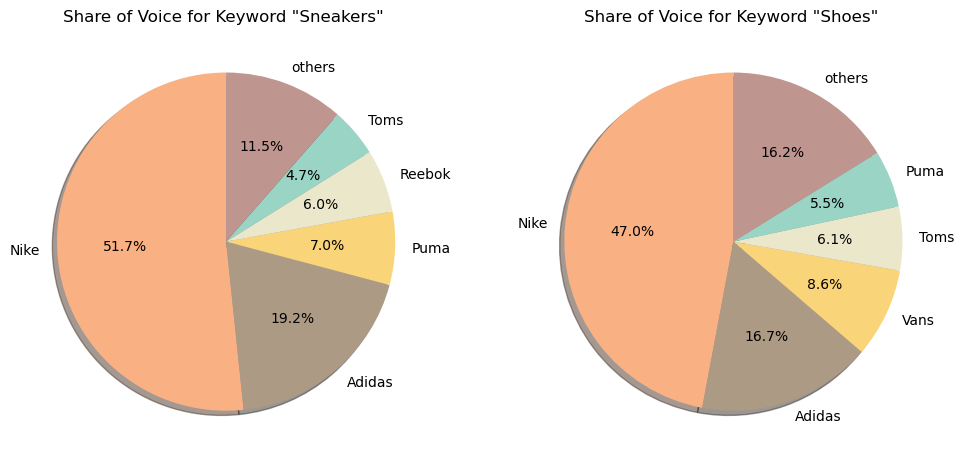

In [114]:
color_set = ('#F9B183', '#AD9A85', '#F9D479',  '#EBE7CB', '#99D4C5', '#BF9590')
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
top5_1.plot(kind = 'pie', y = 'Count', labels = top5_1['Brand'], ax = axes[0], legend=None, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = color_set)
top5_2.plot(kind = 'pie', y = 'Count', labels = top5_2['Brand'], ax = axes[1], legend=None, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = color_set)
axes[0].set_title('Share of Voice for Keyword "Sneakers" ')
axes[1].set_title('Share of Voice for Keyword "Shoes" ')
axes[0].set_ylabel('')
axes[1].set_ylabel('')

plt.show()